In [1]:
import pandas as pd

Task 1 : Import the dataset

In [2]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath )

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [4]:
headers=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
df.columns = headers
df.head()


,age,sex,bmi,children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [5]:
df.replace('?', np.nan, inplace=True)

Task 2 : Data Wrangling

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2767 non-null   object 
 1   sex       2771 non-null   int64  
 2   bmi       2771 non-null   float64
 3   children  2771 non-null   int64  
 4   smoker    2764 non-null   object 
 5   region    2771 non-null   int64  
 6   charges   2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


In [7]:
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2771 non-null   int32  
 1   sex       2771 non-null   int64  
 2   bmi       2771 non-null   float64
 3   children  2771 non-null   int64  
 4   smoker    2771 non-null   int32  
 5   region    2771 non-null   int64  
 6   charges   2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB
None


C:\Users\moroi\AppData\Local\Temp\ipykernel_3220\863333469.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["smoker"].replace(np.nan, is_smoker, inplace=True)
C:\Users\moroi\AppData\Local\Temp\ipykernel_3220\863333469.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,0,4,3756.62160


In [9]:
# Round the charges column to 2 decimal places
df['charges'] = df['charges'].round(2)

# Verify conversion by printing the first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62


Task 3 : Exploratory Data Analysis (EDA)¶


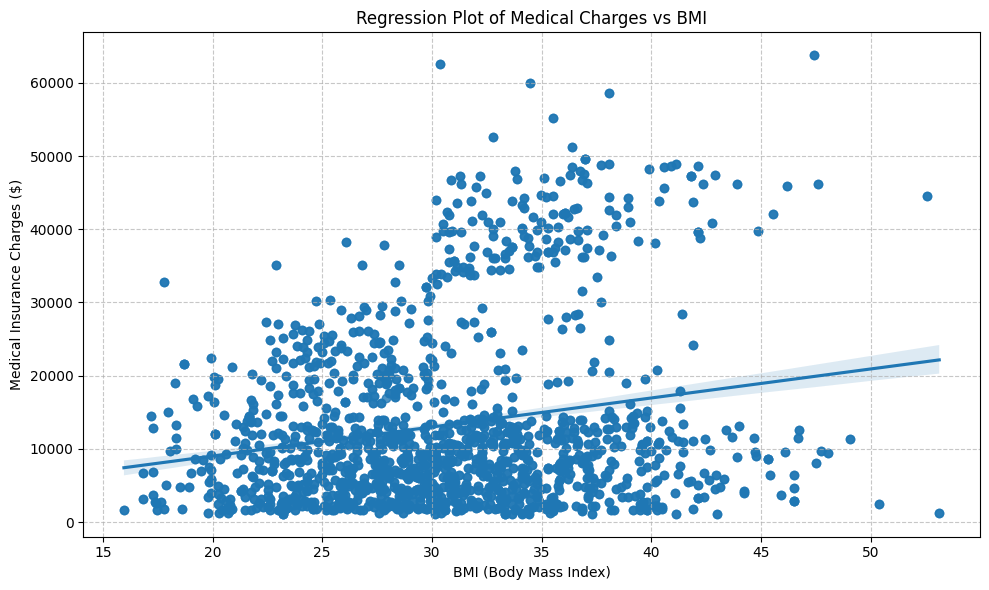

In [10]:
# Create regression plot for charges with respect to bmi
plt.figure(figsize=(10, 6))
sns.regplot(x='bmi', y='charges', data=df)
plt.title('Regression Plot of Medical Charges vs BMI')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Medical Insurance Charges ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

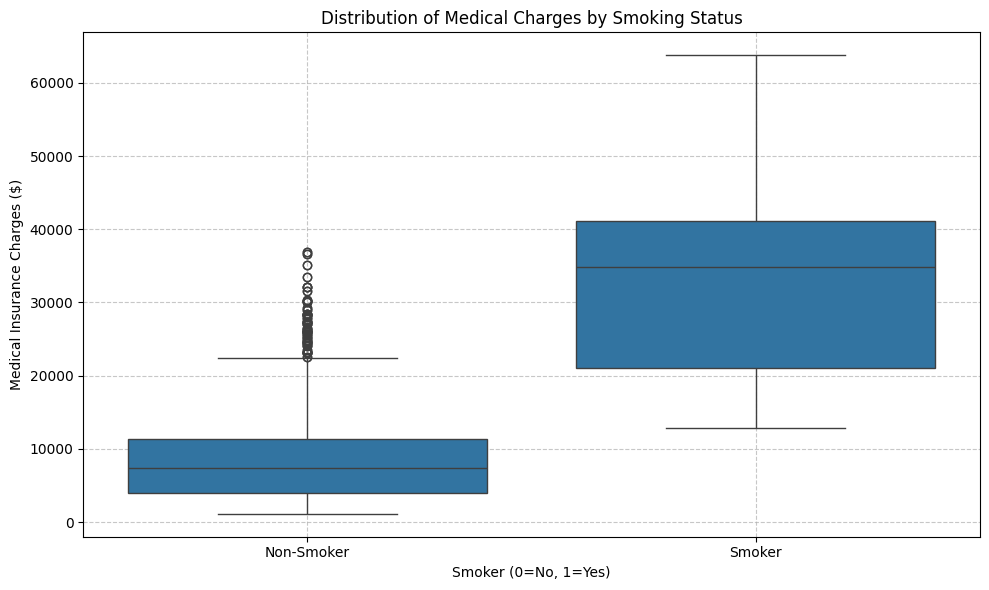

In [11]:
# Create a box plot to compare charges between smokers and non-smokers
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df)

# Add labels and title
plt.title('Distribution of Medical Charges by Smoking Status')
plt.xlabel('Smoker (0=No, 1=Yes)')
plt.ylabel('Medical Insurance Charges ($)')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Correlation Matrix:
               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.026584  0.112859  0.037126 -0.022290 -0.006969  0.298892
sex      -0.026584  1.000000  0.042766  0.015693  0.083125  0.022360  0.062959
bmi       0.112859  0.042766  1.000000 -0.001642  0.011824  0.271200  0.199906
children  0.037126  0.015693 -0.001642  1.000000  0.007016 -0.025594  0.066551
smoker   -0.022290  0.083125  0.011824  0.007016  1.000000  0.053839  0.789141
region   -0.006969  0.022360  0.271200 -0.025594  0.053839  1.000000  0.054018
charges   0.298892  0.062959  0.199906  0.066551  0.789141  0.054018  1.000000


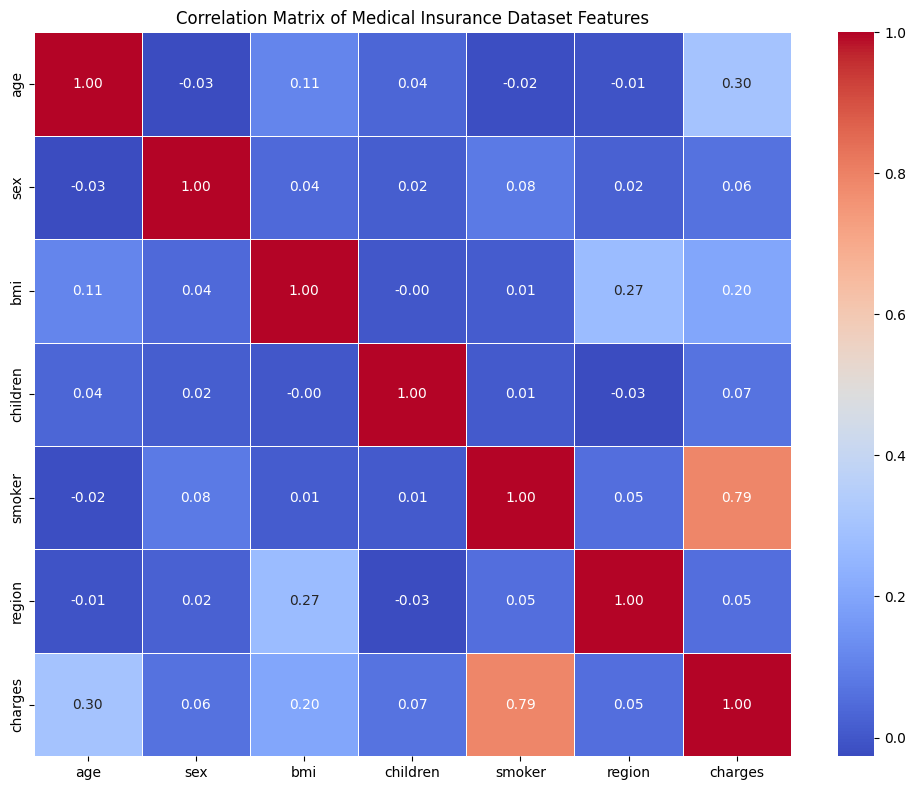

In [12]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Medical Insurance Dataset Features')
plt.tight_layout()
plt.show()

Task 4 : Model Development

In [13]:
# Split data into features and target
X = df[['smoker']]  # Using only smoker attribute
y = df['charges']   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate and print the scores
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Linear Regression Model (charges ~ smoker):")
print(f"Training R² score: {train_score:.4f}")
print(f"Testing R² score: {test_score:.4f}")

# Print model coefficients
print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print('Model score:' ,model.score(X, y))

Linear Regression Model (charges ~ smoker):
Training R² score: 0.6120
Testing R² score: 0.6592
Coefficient: 23412.06
Intercept: 8465.23
Model score: 0.6225394094131347


In [14]:
# Split data into features and target
X_all = df.drop('charges', axis=1)  # Using all attributes except charges
y = df['charges']   # Target variable

# Split the data into training and testing sets
X_train_all, X_test_all, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model_all = LinearRegression()
model_all.fit(X_train_all, y_train)

# Calculate and print the scores
train_score_all = model_all.score(X_train_all, y_train)
test_score_all = model_all.score(X_test_all, y_test)

print("Linear Regression Model (charges ~ all other attributes):")
print(f"Training R² score: {train_score_all:.4f}")
print(f"Testing R² score: {test_score_all:.4f}")

# Print model coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X_all.columns, model_all.coef_):
	print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model_all.intercept_:.2f}")
print('Model score:',model_all.score(X_all, y))

Linear Regression Model (charges ~ all other attributes):
Training R² score: 0.7426
Testing R² score: 0.7774

Model Coefficients:
age: 259.07
sex: -74.95
bmi: 322.94
children: 511.08
smoker: 23637.63
region: -391.65
Intercept: -11078.31
Model score: 0.7503340823833755


In [15]:
# Create a pipeline with StandardScaler, PolynomialFeatures, and LinearRegression
poly_pipeline = Pipeline([
	('scaler', StandardScaler()),
	('polynomial', PolynomialFeatures(degree=2, include_bias=False)),
	('regression', LinearRegression())
])

# Train the model
poly_pipeline.fit(X_train_all, y_train)

# Make predictions and evaluate the model
y_train_pred = poly_pipeline.predict(X_train_all)
y_test_pred = poly_pipeline.predict(X_test_all)

# Calculate R² scores
train_score_pipeline = r2_score(y_train, y_train_pred)
test_score_pipeline = r2_score(y_test, y_test_pred)

print("Polynomial Regression Pipeline Model:")
print(f"Training R² score: {train_score_pipeline:.4f}")
print(f"Testing R² score: {test_score_pipeline:.4f}")

# Calculate MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")

# Compare with previous models
print("\nComparison with previous models:")
print(f"Simple Linear Regression (smoker only) - Testing R²: {test_score:.4f}")
print(f"Multiple Linear Regression (all features) - Testing R²: {test_score_all:.4f}")
print(f"Polynomial Regression Pipeline - Testing R²: {test_score_pipeline:.4f}")

Polynomial Regression Pipeline Model:
Training R² score: 0.8441
Testing R² score: 0.8475
Training MSE: 22415445.97
Testing MSE: 24888401.02

Comparison with previous models:
Simple Linear Regression (smoker only) - Testing R²: 0.6592
Multiple Linear Regression (all features) - Testing R²: 0.7774
Polynomial Regression Pipeline - Testing R²: 0.8475


Task 5 : Model Refinement

In [16]:
# Create a Ridge regression model with alpha=0.1
ridge_model = Ridge(alpha=0.1)

# Train the model
ridge_model.fit(X_train_all, y_train)

# Evaluate the model on test data
ridge_test_score = ridge_model.score(X_test_all, y_test)

# Print the test score
print("Ridge Regression Model:")
print(f"Testing R² score: {ridge_test_score:.4f}")

# Compare with previous models
print("\nComparison with previous models:")
print(f"Simple Linear Regression (smoker only) - Testing R²: {test_score:.4f}")
print(f"Multiple Linear Regression (all features) - Testing R²: {test_score_all:.4f}")
print(f"Polynomial Regression Pipeline - Testing R²: {test_score_pipeline:.4f}")
print(f"Ridge Regression - Testing R²: {ridge_test_score:.4f}")


Ridge Regression Model:
Testing R² score: 0.7774

Comparison with previous models:
Simple Linear Regression (smoker only) - Testing R²: 0.6592
Multiple Linear Regression (all features) - Testing R²: 0.7774
Polynomial Regression Pipeline - Testing R²: 0.8475
Ridge Regression - Testing R²: 0.7774


In [17]:
# Apply polynomial transformation with degree=2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_all)
X_test_poly = poly.transform(X_test_all)

# Initialize and fit a linear regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Calculate R² score on testing data
poly_test_score = poly_model.score(X_test_poly, y_test)

# Print the score
print("Polynomial Regression Model (degree=2):")
print(f"Testing R² score: {poly_test_score:.4f}")

# Compare with previous models
print("\nComparison with previous models:")
print(f"Simple Linear Regression (smoker only) - Testing R²: {test_score:.4f}")
print(f"Multiple Linear Regression (all features) - Testing R²: {test_score_all:.4f}")
print(f"Polynomial Regression Pipeline - Testing R²: {test_score_pipeline:.4f}")
print(f"Ridge Regression - Testing R²: {ridge_test_score:.4f}")
print(f"Polynomial Regression (manual) - Testing R²: {poly_test_score:.4f}")

Polynomial Regression Model (degree=2):
Testing R² score: 0.8476

Comparison with previous models:
Simple Linear Regression (smoker only) - Testing R²: 0.6592
Multiple Linear Regression (all features) - Testing R²: 0.7774
Polynomial Regression Pipeline - Testing R²: 0.8475
Ridge Regression - Testing R²: 0.7774
Polynomial Regression (manual) - Testing R²: 0.8476
